In [1]:
%matplotlib inline

import numpy as np
from numpy import linalg as nla
import scipy as sp
from scipy import linalg as sla
import SHFunctions as shf
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pprint import pprint
from time import time
import os

from jupyterthemes import jtplot
jtplot.style(theme='solarizedl')

from IPython.core.display import display, HTML
np.set_printoptions(linewidth = 270)

In [2]:
# A, S = shf.MakeOneSingA(5, 8, delta = .00000)
# S = np.real(S)
delt = .00000
m = 10
A = shf.MakeSingularA(m, 2, delta = delt)

# A = np.load('200121_Coefficients.npy')

# $S$의 spectral radius 확인
- 목적 : cyclic reduction 적용 가능 여부 확인
- 웬만하면 안 되는 방향으로 ㅋㅋㅋㅋㅋㅋ

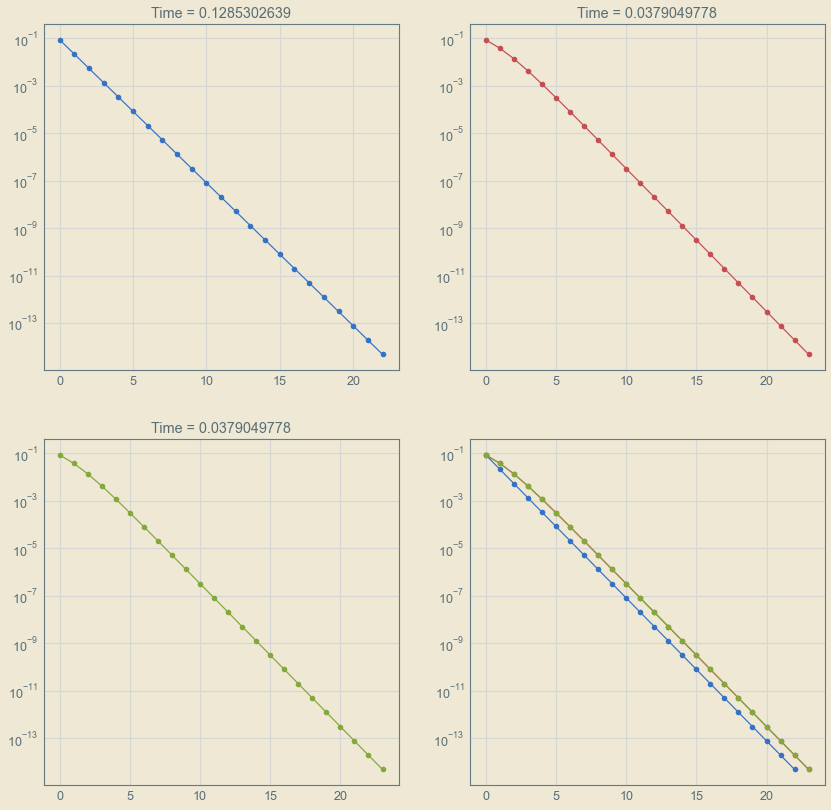

In [3]:
Ss = shf.NewtonPoly(A, X0 = -nla.solve(A[1], A[0]))
S2 = shf.CRPoly(A)
S3 = shf.BrunoCRPoly(A)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14, 14))
ax[0][0].set_title('Time = {:.10f}'.format(Ss['CalTime']))
ax[0][0].semilogy(Ss['errs'], '-ob')

ax[0][1].set_title('Time = {:.10f}'.format(S2['CalTime']))
ax[0][1].semilogy(S2['errs'], '-or')

ax[1][0].set_title('Time = {:.10f}'.format(S2['CalTime']))
ax[1][0].semilogy(S3['errs'], '-og')

ax[1][1].semilogy(Ss['errs'], '-ob')
ax[1][1].semilogy(S2['errs'], '-or')
ax[1][1].semilogy(S3['errs'], '-og')

# 어? 생각보다 잘 되네;;;;
## 망함 ㅋㅋㅋㅋㅋㅋㅋㅋ

In [4]:
np.max(np.abs(nla.eig(Ss['sol'])[0]))

0.9999998808928245

In [5]:
print('Newton : \n{}\nCR : \n{}\nBrunoCR : \n{}'.format(Ss['sol'], S2['sol'], S3['sol']))

Newton : 
[[0.07745471 0.13331374 0.055489   0.12506357 0.09221944 0.12589934 0.07125363 0.09945102 0.10285552 0.11699992]
 [0.09155923 0.07946748 0.07232999 0.11592119 0.110758   0.10155712 0.11082651 0.11970563 0.09691616 0.10095856]
 [0.1487088  0.11059208 0.0508757  0.12621421 0.12238328 0.08059307 0.10295238 0.09654829 0.08979221 0.07133985]
 [0.16968446 0.13001611 0.08216449 0.07229383 0.10385571 0.10364028 0.11314409 0.08265239 0.07028349 0.07226505]
 [0.12256984 0.09238044 0.10321448 0.1177815  0.07743359 0.11390155 0.08231197 0.06567118 0.11962573 0.10510959]
 [0.10314418 0.12964662 0.06259504 0.12137504 0.13248673 0.07124001 0.1185306  0.06367946 0.10669394 0.09060825]
 [0.11430868 0.13332664 0.06130262 0.07833821 0.14404386 0.12396339 0.06436465 0.08188017 0.07681238 0.12165929]
 [0.14534328 0.11234327 0.10292395 0.08734785 0.09272964 0.09456701 0.13913481 0.05853925 0.09586545 0.07120538]
 [0.11026635 0.1017641  0.0849379  0.09636347 0.12678572 0.12735226 0.06617621 0.10783

In [6]:
print('Solution Difference\nNewton - CR : {}\nNewton - Bruno : {}'.format(nla.norm(Ss['sol'] - S2['sol'], 'fro'), nla.norm(Ss['sol'] - S3['sol'], 'fro')))

Solution Difference
Newton - CR : 2.3123991193195577e-11
Newton - Bruno : 2.3123991193195577e-11


In [7]:
print('Errors\nNewton : {}\nCR : {}\nBruno : {}'.format(nla.norm(shf.Pnomial(Ss['sol'], A), 'fro'), nla.norm(shf.Pnomial(S2['sol'], A), 'fro'), nla.norm(shf.Pnomial(S3['sol'], A), 'fro')))

Errors
Newton : 4.777914186916802e-15
CR : 4.7984923466324096e-15
Bruno : 4.7984923466324096e-15


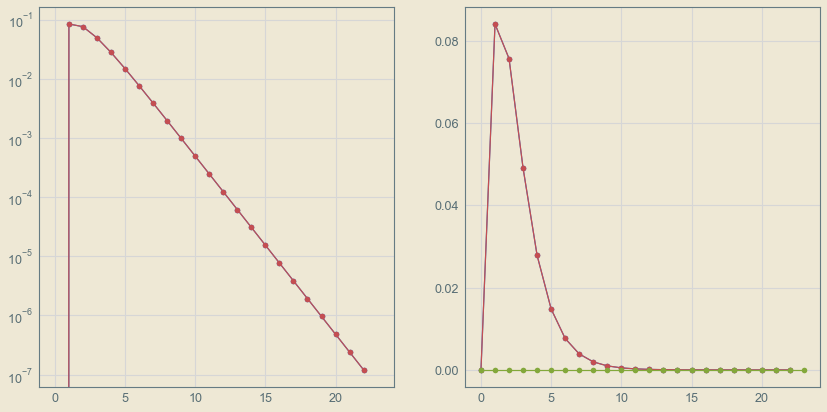

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))
ax[0].semilogy([nla.norm(Ss['Xs'][i] - S2['Xs'][i], 'fro') for i in range(np.min([len(Ss['Xs']), len(S2['Xs'])]))], '-ob')
ax[0].semilogy([nla.norm(Ss['Xs'][i] - S2['Xs'][i], 'fro') for i in range(np.min([len(Ss['Xs']), len(S3['Xs'])]))], '-or')
ax[0].semilogy([nla.norm(S2['Xs'][i] - S3['Xs'][i], 'fro') for i in range(np.min([len(S2['Xs']), len(S3['Xs'])]))], '-og')

ax[1].plot([nla.norm(Ss['Xs'][i] - S2['Xs'][i], 'fro') for i in range(np.min([len(Ss['Xs']), len(S2['Xs'])]))], '-ob')
ax[1].plot([nla.norm(Ss['Xs'][i] - S2['Xs'][i], 'fro') for i in range(np.min([len(Ss['Xs']), len(S3['Xs'])]))], '-or')
ax[1].plot([nla.norm(S2['Xs'][i] - S3['Xs'][i], 'fro') for i in range(np.min([len(S2['Xs']), len(S3['Xs'])]))], '-og')

# $S$의 spectral radius를 키워보자

In [9]:
delt = .00000
m = 10
A = shf.MakeSingularA(m, 2, delta = delt)

alph = .1
B = A.copy()
A[1] = B[1] - 2*alph*B[2]
A[0] = alph**2 *B[2] - alph*B[1] + B[0]

C:\00_Data\Jupyter\SSH\NonlinearMatrixEquations\SHFunctions.py:291: RuntimeWarning: overflow encountered in matmul
  C1 = C0 @ nla.inv(B0) @ C0
C:\00_Data\Jupyter\SSH\NonlinearMatrixEquations\SHFunctions.py:288: RuntimeWarning: invalid value encountered in matmul
  T0 = T0 - A0 @ nla.inv(B0) @ C0
C:\00_Data\Jupyter\SSH\NonlinearMatrixEquations\SHFunctions.py:290: RuntimeWarning: invalid value encountered in matmul
  B1 = B0 - A0 @ nla.inv(B0) @ C0 - C0 @ nla.inv(B0) @ A0
C:\00_Data\Jupyter\SSH\NonlinearMatrixEquations\SHFunctions.py:353: RuntimeWarning: overflow encountered in matmul
  C0 = F0 @ C0
C:\00_Data\Jupyter\SSH\NonlinearMatrixEquations\SHFunctions.py:352: RuntimeWarning: invalid value encountered in matmul
  W = F2 @ C0
C:\00_Data\Jupyter\SSH\NonlinearMatrixEquations\SHFunctions.py:356: RuntimeWarning: invalid value encountered in matmul
  W = F0 @ A0


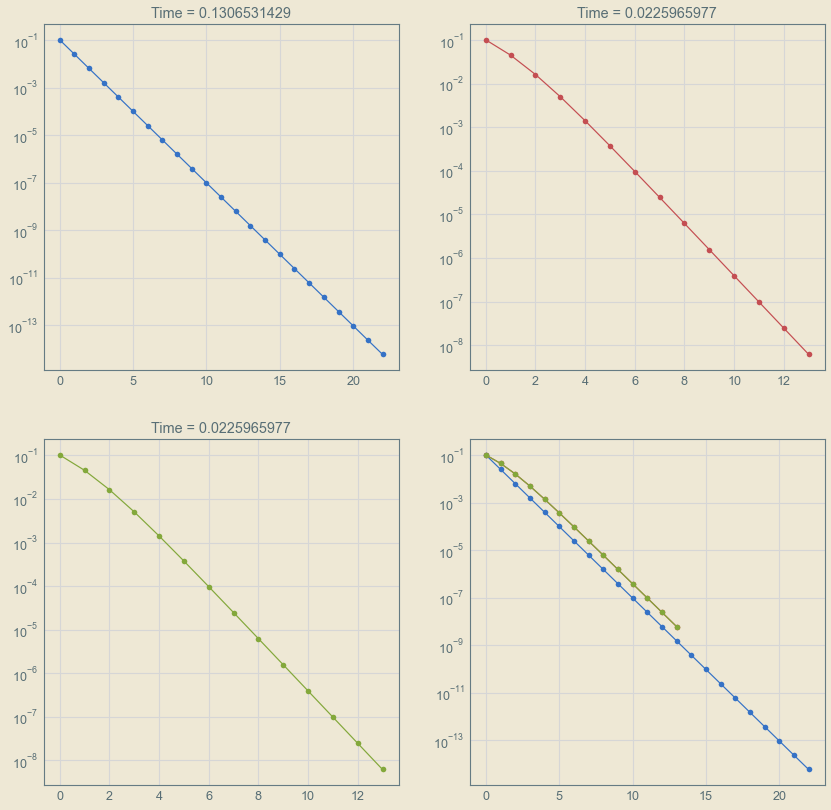

In [10]:
Ss = shf.NewtonPoly(A, X0 = -nla.solve(A[1], A[0]))
S2 = shf.CRPoly(A)
S3 = shf.BrunoCRPoly(A)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14, 14))
ax[0][0].set_title('Time = {:.10f}'.format(Ss['CalTime']))
ax[0][0].semilogy(Ss['errs'], '-ob')

ax[0][1].set_title('Time = {:.10f}'.format(S2['CalTime']))
ax[0][1].semilogy(S2['errs'], '-or')

ax[1][0].set_title('Time = {:.10f}'.format(S2['CalTime']))
ax[1][0].semilogy(S3['errs'], '-og')

ax[1][1].semilogy(Ss['errs'], '-ob')
ax[1][1].semilogy(S2['errs'], '-or')
ax[1][1].semilogy(S3['errs'], '-og')

In [11]:
print('Newton : \n{}\nCR : \n{}\nBrunoCR : \n{}'.format(Ss['sol'], S2['sol'], S3['sol']))

Newton : 
[[0.18791696 0.09674587 0.09449577 0.06351199 0.10703301 0.13410262 0.11805782 0.0733252  0.09133549 0.13347513]
 [0.13957792 0.15326618 0.08007225 0.10660756 0.12772599 0.12645367 0.08829054 0.07321005 0.10290352 0.10189218]
 [0.10363382 0.09269521 0.15623046 0.0878768  0.1288243  0.13528077 0.12487062 0.10464438 0.06419276 0.10175077]
 [0.12750815 0.07451719 0.07688436 0.16124761 0.09835747 0.1566187  0.10341125 0.07415102 0.12226825 0.10503586]
 [0.15280453 0.05971802 0.08651856 0.08611057 0.17859834 0.15312182 0.10221228 0.08833307 0.07999759 0.11258508]
 [0.15727574 0.06597876 0.09386022 0.11282366 0.13780589 0.18831187 0.10590431 0.07234962 0.08433476 0.08135505]
 [0.1334722  0.08833572 0.063872   0.07107426 0.15049082 0.11389751 0.17568792 0.13829145 0.06118266 0.10369532]
 [0.11087077 0.09907276 0.12024993 0.11307551 0.09188537 0.10732776 0.12853083 0.15858079 0.0909218  0.07948434]
 [0.11941572 0.10024368 0.08183163 0.10505144 0.10982191 0.13989834 0.10800333 0.07476

In [12]:
print('Solution Difference\nNewton - CR : {}\nNewton - Bruno : {}'.format(nla.norm(Ss['sol'] - S2['sol'], 'fro'), nla.norm(Ss['sol'] - S3['sol'], 'fro')))

Solution Difference
Newton - CR : nan
Newton - Bruno : nan


In [13]:
print('Errors\nNewton : {}\nCR : {}\nBruno : {}'.format(nla.norm(shf.Pnomial(Ss['sol'], A), 'fro'), nla.norm(shf.Pnomial(S2['sol'], A), 'fro'), nla.norm(shf.Pnomial(S3['sol'], A), 'fro')))

Errors
Newton : 5.851827709184978e-15
CR : nan
Bruno : nan


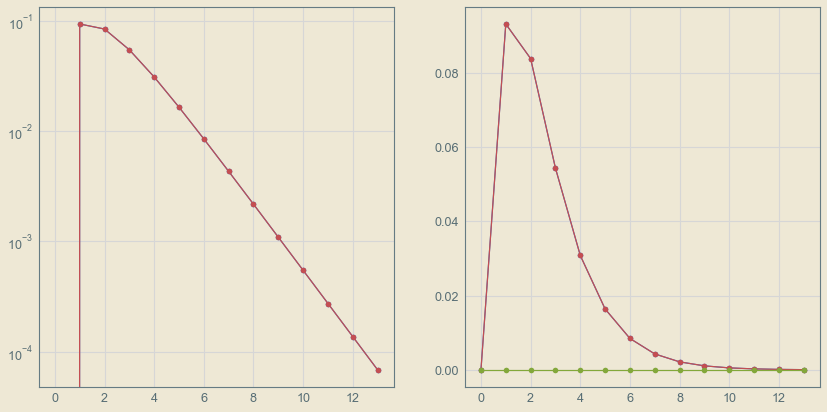

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))
ax[0].semilogy([nla.norm(Ss['Xs'][i] - S2['Xs'][i], 'fro') for i in range(np.min([len(Ss['Xs']), len(S2['Xs'])]))], '-ob')
ax[0].semilogy([nla.norm(Ss['Xs'][i] - S2['Xs'][i], 'fro') for i in range(np.min([len(Ss['Xs']), len(S3['Xs'])]))], '-or')
ax[0].semilogy([nla.norm(S2['Xs'][i] - S3['Xs'][i], 'fro') for i in range(np.min([len(S2['Xs']), len(S3['Xs'])]))], '-og')

ax[1].plot([nla.norm(Ss['Xs'][i] - S2['Xs'][i], 'fro') for i in range(np.min([len(Ss['Xs']), len(S2['Xs'])]))], '-ob')
ax[1].plot([nla.norm(Ss['Xs'][i] - S2['Xs'][i], 'fro') for i in range(np.min([len(Ss['Xs']), len(S3['Xs'])]))], '-or')
ax[1].plot([nla.norm(S2['Xs'][i] - S3['Xs'][i], 'fro') for i in range(np.min([len(S2['Xs']), len(S3['Xs'])]))], '-og')

In [15]:
np.max(np.abs(nla.eig(np.eye(10) + A[1])[0]))

0.26666666666666655

# Cyclic Reduction이 잘 작동하지 않는 예를 찾은 것 같은데??
## 아래의 $A$'s가 예시일 듯

In [16]:
np.set_printoptions(suppress=True)
A

array([[[ 0.1       ,  0.04117337,  0.03724614,  0.00201706,  0.02493058,  0.04575918,  0.03960921,  0.01436218,  0.03526054,  0.06297507],
        [ 0.04951985,  0.1       ,  0.02247349,  0.04382339,  0.04758561,  0.03620931,  0.01224849,  0.01634834,  0.04376806,  0.03135678],
        [ 0.01430917,  0.03758421,  0.1       ,  0.02512017,  0.04706656,  0.04689581,  0.04738232,  0.04395944,  0.00789854,  0.0331171 ],
        [ 0.03768621,  0.01925223,  0.01951318,  0.1       ,  0.01789376,  0.06669898,  0.02656528,  0.01682066,  0.06333466,  0.03556839],
        [ 0.0623264 ,  0.00528571,  0.02800205,  0.02437542,  0.1       ,  0.06367697,  0.02419345,  0.02994692,  0.02312914,  0.04239726],
        [ 0.06729706,  0.01112288,  0.03563554,  0.05131526,  0.0572916 ,  0.1       ,  0.02955107,  0.01415044,  0.02624438,  0.0107251 ],
        [ 0.04356089,  0.03287645,  0.00490976,  0.00919795,  0.07009677,  0.02642262,  0.1       ,  0.07739114,  0.00457281,  0.03430493],
        [ 0.02389123

# UQME 상대로도 테스트가 필요
## 그래서 아래를 테스트해 봅시다

In [17]:
delt = .00000
m = 10
A = np.zeros((3, m, m))
A[2] = np.eye(m)
A[0][np.diag_indices(m)] = 15*np.ones(m)
A[0][np.arange(0, 9), np.arange(1, 10)] = -1*np.ones(m-1)
A[0][np.arange(1, 10), np.arange(0, 9)] = -1*np.ones(m-1)
A[1][np.diag_indices(m)] = 30*np.ones(m)
A[1][np.arange(0, 9), np.arange(1, 10)] = -10*np.ones(m-1)
A[1][np.arange(1, 10), np.arange(0, 9)] = -10*np.ones(m-1)
# A[1, 0, 0], A[1, m-1, m-1] = 20, 20

In [18]:
nla.solve(A[1], A[0]) >= -np.finfo(float).eps

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,  True]])

C:\00_Data\Jupyter\SSH\NonlinearMatrixEquations\SHFunctions.py:318: RuntimeWarning: invalid value encountered in double_scalars
  c2 = np.dot(x2,y2) / (nla.norm(x2,2)*nla.norm(y2,2))
C:\00_Data\Jupyter\SSH\NonlinearMatrixEquations\SHFunctions.py:386: RuntimeWarning: invalid value encountered in double_scalars
  c2 = np.dot(x2,y2) / (nla.norm(x2,2)*nla.norm(y2,2))


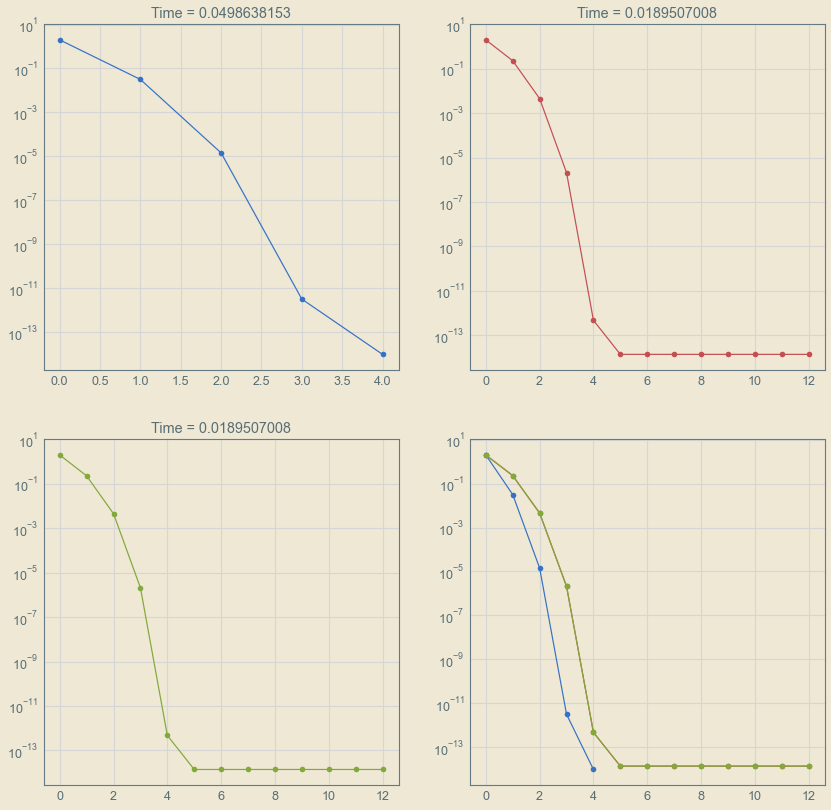

In [19]:
Ss = shf.NewtonPoly(A, X0 = -nla.solve(A[1], A[0]))
S2 = shf.CRPoly(A)
S3 = shf.BrunoCRPoly(A)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14, 14))
ax[0][0].set_title('Time = {:.10f}'.format(Ss['CalTime']))
ax[0][0].semilogy(Ss['errs'], '-ob')

ax[0][1].set_title('Time = {:.10f}'.format(S2['CalTime']))
ax[0][1].semilogy(S2['errs'], '-or')

ax[1][0].set_title('Time = {:.10f}'.format(S2['CalTime']))
ax[1][0].semilogy(S3['errs'], '-og')

ax[1][1].semilogy(Ss['errs'], '-ob')
ax[1][1].semilogy(S2['errs'], '-or')
ax[1][1].semilogy(S3['errs'], '-og')

In [20]:
print('Newton : \n{}\nCR : \n{}\nBrunoCR : \n{}'.format(Ss['sol'], S2['sol'], S3['sol']))

Newton : 
[[-0.57789883 -0.19563316 -0.08243154 -0.03574062 -0.01592767 -0.00728026 -0.00339984 -0.00160692 -0.00074492 -0.00029401]
 [-0.19563316 -0.66033036 -0.23137377 -0.09835921 -0.04302088 -0.01932751 -0.00888718 -0.00414476 -0.00190093 -0.00074492]
 [-0.08243154 -0.23137377 -0.67625804 -0.23865404 -0.10175905 -0.0446278  -0.02007244 -0.0091812  -0.00414476 -0.00160692]
 [-0.03574062 -0.09835921 -0.23865404 -0.67965787 -0.24026096 -0.10250397 -0.04492181 -0.02007244 -0.00888718 -0.00339984]
 [-0.01592767 -0.04302088 -0.10175905 -0.24026096 -0.6804028  -0.24055497 -0.10250397 -0.0446278  -0.01932751 -0.00728026]
 [-0.00728026 -0.01932751 -0.0446278  -0.10250397 -0.24055497 -0.6804028  -0.24026096 -0.10175905 -0.04302088 -0.01592767]
 [-0.00339984 -0.00888718 -0.02007244 -0.04492181 -0.10250397 -0.24026096 -0.67965787 -0.23865404 -0.09835921 -0.03574062]
 [-0.00160692 -0.00414476 -0.0091812  -0.02007244 -0.0446278  -0.10175905 -0.23865404 -0.67625804 -0.23137377 -0.08243154]
 [-0.0

In [21]:
print('Solution Difference\nNewton - CR : {}\nNewton - Bruno : {}'.format(nla.norm(Ss['sol'] - S2['sol'], 'fro'), nla.norm(Ss['sol'] - S3['sol'], 'fro')))

Solution Difference
Newton - CR : nan
Newton - Bruno : nan


In [22]:
print('Errors\nNewton : {}\nCR : {}\nBruno : {}'.format(nla.norm(shf.Pnomial(Ss['sol'], A), 'fro'), nla.norm(shf.Pnomial(S2['sol'], A), 'fro'), nla.norm(shf.Pnomial(S3['sol'], A), 'fro')))

Errors
Newton : 9.73382931378471e-15
CR : nan
Bruno : nan


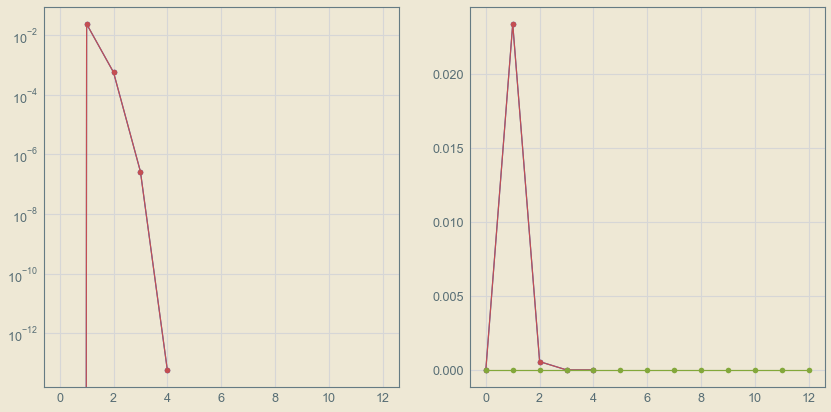

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))
ax[0].semilogy([nla.norm(Ss['Xs'][i] - S2['Xs'][i], 'fro') for i in range(np.min([len(Ss['Xs']), len(S2['Xs'])]))], '-ob')
ax[0].semilogy([nla.norm(Ss['Xs'][i] - S2['Xs'][i], 'fro') for i in range(np.min([len(Ss['Xs']), len(S3['Xs'])]))], '-or')
ax[0].semilogy([nla.norm(S2['Xs'][i] - S3['Xs'][i], 'fro') for i in range(np.min([len(S2['Xs']), len(S3['Xs'])]))], '-og')

ax[1].plot([nla.norm(Ss['Xs'][i] - S2['Xs'][i], 'fro') for i in range(np.min([len(Ss['Xs']), len(S2['Xs'])]))], '-ob')
ax[1].plot([nla.norm(Ss['Xs'][i] - S2['Xs'][i], 'fro') for i in range(np.min([len(Ss['Xs']), len(S3['Xs'])]))], '-or')
ax[1].plot([nla.norm(S2['Xs'][i] - S3['Xs'][i], 'fro') for i in range(np.min([len(S2['Xs']), len(S3['Xs'])]))], '-og')

In [24]:
np.max(np.abs(nla.eig(Ss['sol'])[0]))

1.3883837557442884

## 추가 solution 평행이동

In [25]:
delt = .00000
m = 10
A = np.zeros((3, m, m))
A[2] = np.eye(m)
A[0][np.diag_indices(m)] = 15*np.ones(m)
A[0][np.arange(0, 9), np.arange(1, 10)] = -1*np.ones(m-1)
A[0][np.arange(1, 10), np.arange(0, 9)] = -1*np.ones(m-1)
A[1][np.diag_indices(m)] = 30*np.ones(m)
A[1][np.arange(0, 9), np.arange(1, 10)] = -10*np.ones(m-1)
A[1][np.arange(1, 10), np.arange(0, 9)] = -10*np.ones(m-1)
# A[1, 0, 0], A[1, m-1, m-1] = 20, 20

alph = -2.
B = A.copy()
A[1] = B[1] - 2*alph*B[2]
A[0] = alph**2 *B[2] - alph*B[1] + B[0]

In [26]:
nla.solve(A[1], A[0]) >= -np.finfo(float).eps

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,  True]])

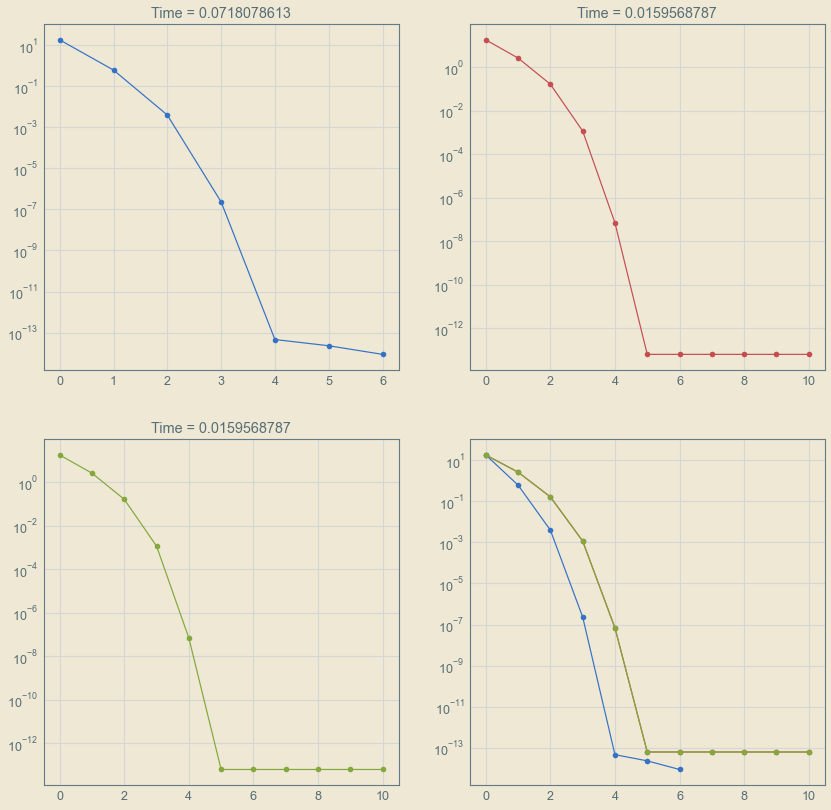

In [27]:
Ss = shf.NewtonPoly(A, X0 = -nla.solve(A[1], A[0]))
S2 = shf.CRPoly(A)
S3 = shf.BrunoCRPoly(A)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14, 14))
ax[0][0].set_title('Time = {:.10f}'.format(Ss['CalTime']))
ax[0][0].semilogy(Ss['errs'], '-ob')

ax[0][1].set_title('Time = {:.10f}'.format(S2['CalTime']))
ax[0][1].semilogy(S2['errs'], '-or')

ax[1][0].set_title('Time = {:.10f}'.format(S2['CalTime']))
ax[1][0].semilogy(S3['errs'], '-og')

ax[1][1].semilogy(Ss['errs'], '-ob')
ax[1][1].semilogy(S2['errs'], '-or')
ax[1][1].semilogy(S3['errs'], '-og')

In [28]:
print('Newton : \n{}\nCR : \n{}\nBrunoCR : \n{}'.format(Ss['sol'], S2['sol'], S3['sol']))

Newton : 
[[-2.57789883 -0.19563316 -0.08243154 -0.03574062 -0.01592767 -0.00728026 -0.00339984 -0.00160692 -0.00074492 -0.00029401]
 [-0.19563316 -2.66033036 -0.23137377 -0.09835921 -0.04302088 -0.01932751 -0.00888718 -0.00414476 -0.00190093 -0.00074492]
 [-0.08243154 -0.23137377 -2.67625804 -0.23865404 -0.10175905 -0.0446278  -0.02007244 -0.0091812  -0.00414476 -0.00160692]
 [-0.03574062 -0.09835921 -0.23865404 -2.67965787 -0.24026096 -0.10250397 -0.04492181 -0.02007244 -0.00888718 -0.00339984]
 [-0.01592767 -0.04302088 -0.10175905 -0.24026096 -2.6804028  -0.24055497 -0.10250397 -0.0446278  -0.01932751 -0.00728026]
 [-0.00728026 -0.01932751 -0.0446278  -0.10250397 -0.24055497 -2.6804028  -0.24026096 -0.10175905 -0.04302088 -0.01592767]
 [-0.00339984 -0.00888718 -0.02007244 -0.04492181 -0.10250397 -0.24026096 -2.67965787 -0.23865404 -0.09835921 -0.03574062]
 [-0.00160692 -0.00414476 -0.0091812  -0.02007244 -0.0446278  -0.10175905 -0.23865404 -2.67625804 -0.23137377 -0.08243154]
 [-0.0

In [29]:
print('Solution Difference\nNewton - CR : {}\nNewton - Bruno : {}'.format(nla.norm(Ss['sol'] - S2['sol'], 'fro'), nla.norm(Ss['sol'] - S3['sol'], 'fro')))

Solution Difference
Newton - CR : nan
Newton - Bruno : nan


In [30]:
print('Errors\nNewton : {}\nCR : {}\nBruno : {}'.format(nla.norm(shf.Pnomial(Ss['sol'], A), 'fro'), nla.norm(shf.Pnomial(S2['sol'], A), 'fro'), nla.norm(shf.Pnomial(S3['sol'], A), 'fro')))

Errors
Newton : 8.777851260813991e-15
CR : nan
Bruno : nan


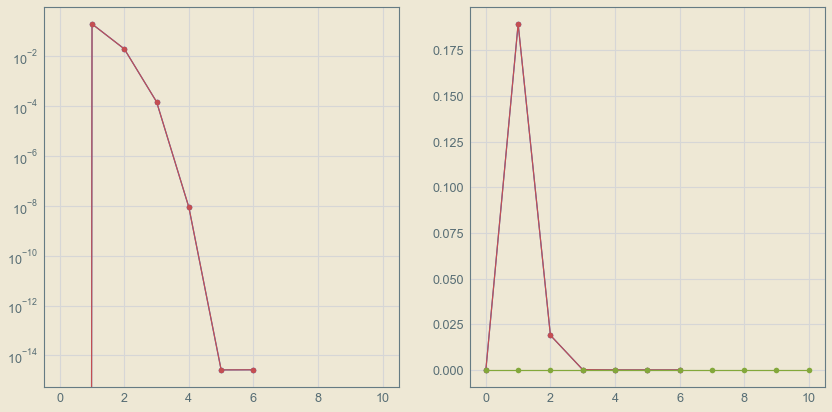

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))
ax[0].semilogy([nla.norm(Ss['Xs'][i] - S2['Xs'][i], 'fro') for i in range(np.min([len(Ss['Xs']), len(S2['Xs'])]))], '-ob')
ax[0].semilogy([nla.norm(Ss['Xs'][i] - S2['Xs'][i], 'fro') for i in range(np.min([len(Ss['Xs']), len(S3['Xs'])]))], '-or')
ax[0].semilogy([nla.norm(S2['Xs'][i] - S3['Xs'][i], 'fro') for i in range(np.min([len(S2['Xs']), len(S3['Xs'])]))], '-og')

ax[1].plot([nla.norm(Ss['Xs'][i] - S2['Xs'][i], 'fro') for i in range(np.min([len(Ss['Xs']), len(S2['Xs'])]))], '-ob')
ax[1].plot([nla.norm(Ss['Xs'][i] - S2['Xs'][i], 'fro') for i in range(np.min([len(Ss['Xs']), len(S3['Xs'])]))], '-or')
ax[1].plot([nla.norm(S2['Xs'][i] - S3['Xs'][i], 'fro') for i in range(np.min([len(S2['Xs']), len(S3['Xs'])]))], '-og')

In [32]:
np.max(np.abs(nla.eig(Ss['sol'])[0]))

3.38838375574429

# $B^{-1}C \geq 0$가 성립하는 parameter 어떻게 찾을지 알아봐야겠는데....

In [33]:
divi = 1001

m = 4
B, C = np.zeros((m, m)), np.zeros((m, m))
C[np.diag_indices(m)] = 15*np.ones(m)
C[np.arange(0, m-1), np.arange(1, m)] = -1*np.ones(m-1)
C[np.arange(1, m), np.arange(0, m-1)] = -1*np.ones(m-1)
B[np.diag_indices(m)] = 30*np.ones(m)
B[np.arange(0, m-1), np.arange(1, m)] = -10*np.ones(m-1)
B[np.arange(1, m), np.arange(0, m-1)] = -10*np.ones(m-1)
# B[0, 0], B[m-1, m-1] = 20, 20

alph = -.01
BB, CC = B, C
B = BB - 2*alph*np.eye(m)
C = alph**2 *np.eye(m) - alph*BB + CC

In [34]:
B, C

(array([[ 30.02, -10.  ,   0.  ,   0.  ],
        [-10.  ,  30.02, -10.  ,   0.  ],
        [  0.  , -10.  ,  30.02, -10.  ],
        [  0.  ,   0.  , -10.  ,  30.02]]),
 array([[15.3001, -1.1   ,  0.    ,  0.    ],
        [-1.1   , 15.3001, -1.1   ,  0.    ],
        [ 0.    , -1.1   , 15.3001, -1.1   ],
        [ 0.    ,  0.    , -1.1   , 15.3001]]))

In [35]:
tb = 30.02
tc = 15.3001
tc*(tb*np.eye(m) - B) - tb*(tc*np.eye(m) - C)

array([[  0.   , 119.979,   0.   ,   0.   ],
       [119.979,   0.   , 119.979,   0.   ],
       [  0.   , 119.979,   0.   , 119.979],
       [  0.   ,   0.   , 119.979,   0.   ]])

In [36]:
nla.solve(B, C)

array([[0.56769354, 0.17420599, 0.06527286, 0.02174312],
       [0.17420599, 0.63296639, 0.19594912, 0.06527286],
       [0.06527286, 0.19594912, 0.63296639, 0.17420599],
       [0.02174312, 0.06527286, 0.17420599, 0.56769354]])

In [37]:
b = np.linspace(20, 40, divi)
c = np.linspace(5, 25, divi)
bb, cc = np.meshgrid(b, c)

In [38]:
BC = np.zeros((divi, divi, m, m))
for i in range(divi):
    for j in range(divi):
        BC[i,j] = c[j]*(b[i]*np.eye(m) - B) - b[i]*(c[j]*np.eye(m) - C)

In [39]:
BC.min(axis=(2, 3))

array([[   0.      ,    0.      ,    0.      , ..., -443.2972  , -443.8976  , -444.498   ],
       [   0.      ,    0.      ,    0.      , ..., -442.991198, -443.591598, -444.191998],
       [   0.      ,    0.      ,    0.      , ..., -442.685196, -443.285596, -443.885996],
       ...,
       [   0.      ,    0.      ,    0.      , ..., -137.907204, -138.507604, -139.108004],
       [   0.      ,    0.      ,    0.      , ..., -137.601202, -138.201602, -138.802002],
       [   0.      ,    0.      ,    0.      , ..., -137.2952  , -137.8956  , -138.496   ]])

In [40]:
b.min(), b.max(), c.min(), c.max()

(20.0, 40.0, 5.0, 25.0)

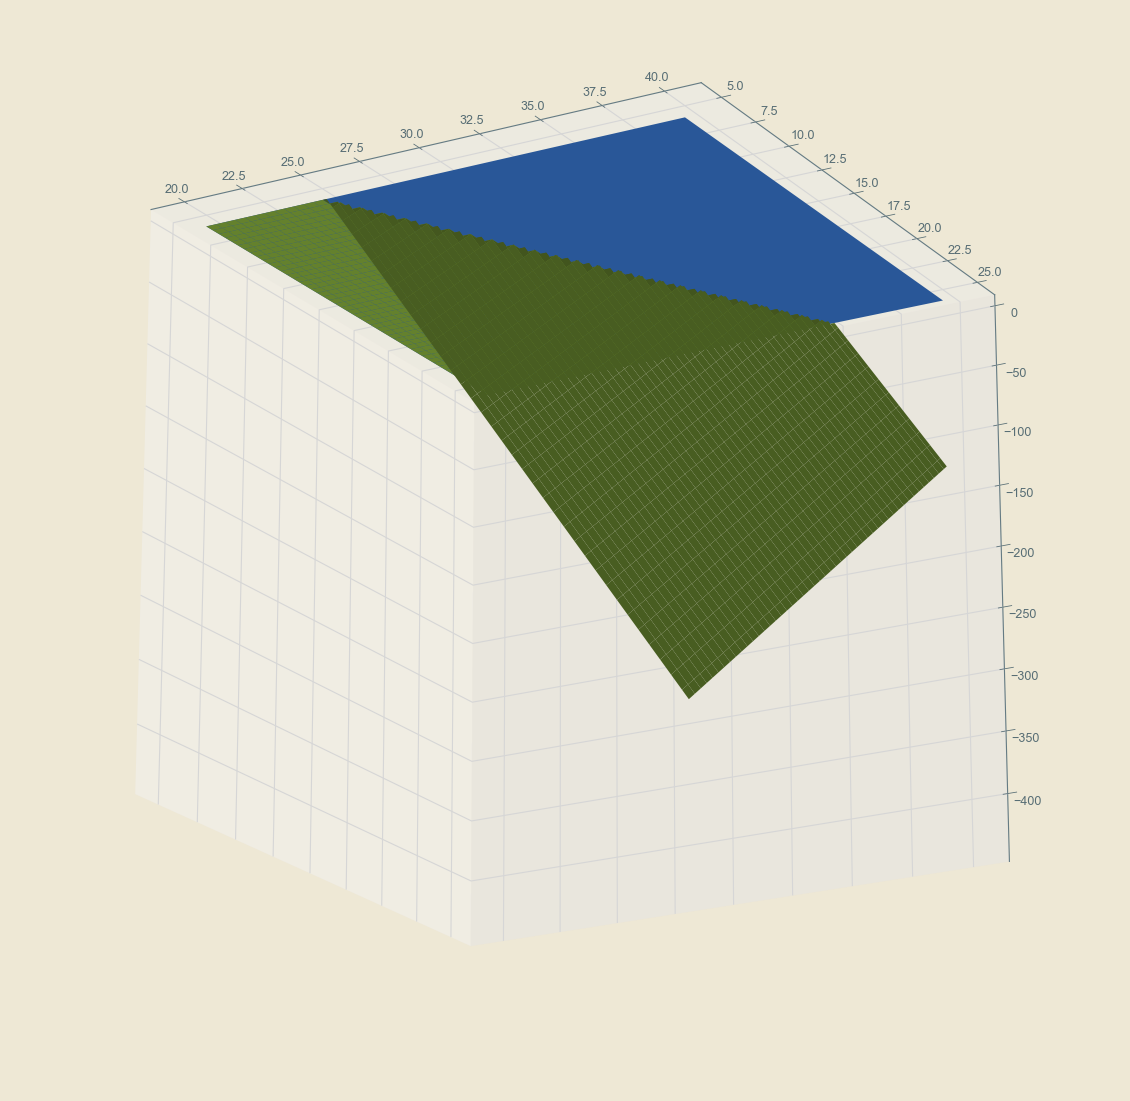

In [41]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (20, 20), subplot_kw = {'projection':'3d'})
ax.plot_surface(np.array([[b.min(), b.max()], [b.min(), b.max()]]), 
                np.array([[c.min(), c.min()], [c.max(), c.max()]]), 
                np.zeros((2, 2)))
ax.plot_surface(bb, cc, BC.min((2, 3)))#, levels=np.arange(-200, 200, 20))
ax.view_init(elev = -20)

In [42]:
t = np.where(BC.min((2, 3)) > -1e-1)

(20.0, 40.0, 5.0, 25.0)

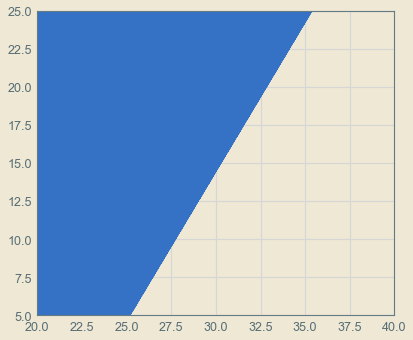

In [43]:
plt.plot(bb[t], cc[t], '-')
plt.axis([b.min(), b.max(), c.min(), c.max()])

# 이번엔 알파 변환에 따른 $B^{-1}C$의 최소값 보기

In [44]:
m = 10
B, C = np.zeros((m, m)), np.zeros((m, m))
C[np.diag_indices(m)] = 15*np.ones(m)
C[np.arange(0, m-1), np.arange(1, m)] = -1*np.ones(m-1)
C[np.arange(1, m), np.arange(0, m-1)] = -1*np.ones(m-1)
B[np.diag_indices(m)] = 30*np.ones(m)
B[np.arange(0, m-1), np.arange(1, m)] = -10*np.ones(m-1)
B[np.arange(1, m), np.arange(0, m-1)] = -10*np.ones(m-1)
# B[0, 0], B[m-1, m-1] = 20, 20

In [45]:
divi = 10001
alph = np.linspace(-5, 5, divi)
alph = np.stack([alph]*m, axis = -1)
alph = np.stack([alph]*m, axis = -1)

BB, CC = np.stack([B]*divi), np.stack([C]*divi)

eyem = np.stack([np.eye(m)]*divi)

B = BB - 2*alph*eyem
C = alph**2 *eyem - alph*BB + CC

In [46]:
BC = nla.inv(B) @ C

In [47]:
BC.min(axis=(1, 2)).shape

(10001,)

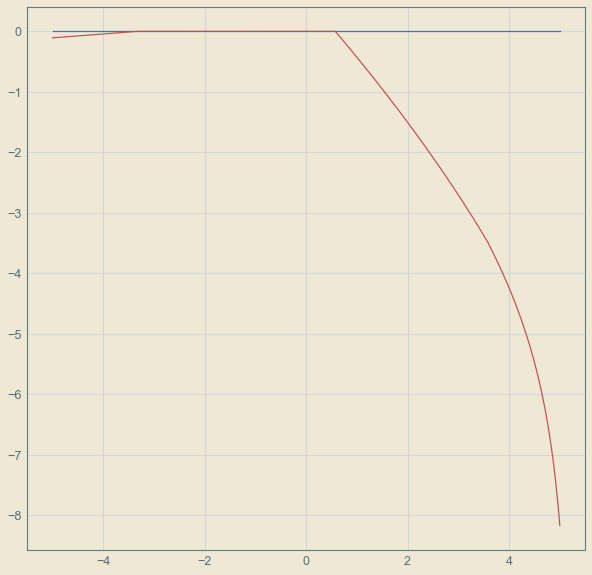

In [48]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 10))
ax.plot([alph.min(), alph.max()], [0, 0], 'b')
ax.plot(alph.min((1, 2)), BC.min((1, 2)), 'r')

In [49]:
t = np.where(BC.min((1, 2)) > -1e-10)

(-5.0, 5.0)

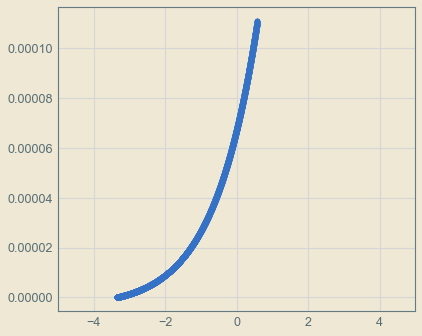

In [50]:
plt.plot(alph.min((1, 2))[t], BC.min((1, 2))[t], '-ob')
plt.xlim([alph.min(), alph.max()])

(-5.0, 5.0, 1.786146167275934e-09, 0.00011112112697973038)

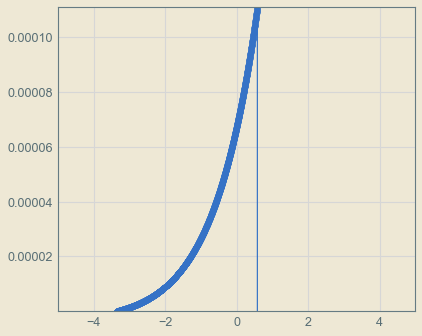

In [51]:
plt.plot(alph.min((1, 2)), BC.min((1, 2)), '-ob')
plt.axis([alph.min(), alph.max(), BC.min((1, 2))[t].min(), BC.min((1, 2))[t].max()])

(-5.0, 5.0, -0.00011112112697973038, 0.00011112112697973038)

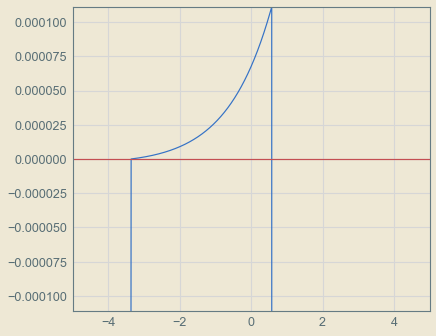

In [52]:
plt.plot(alph.min((1, 2)), BC.min((1, 2)), '-b')
plt.plot([alph.min(), alph.max()], [0, 0], '-r')
plt.axis([alph.min(), alph.max(), -1*BC.min((1, 2))[t].max(), BC.min((1, 2))[t].max()])